In [2]:
import numpy as np
import matplotlib.pyplot as plt
#from work.lab_utils_multi import  load_house_data, run_gradient_descent 
from work.lab_utils_multi import  norm_plot, plt_equal_scale, plot_cost_i_w
from work.lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

# practice

In [3]:
def load_house_data(path):
    with open(path, "r") as file:
        data = file.readlines()
    X_train = []
    y_train = []
    for i in range(len(data)):
        tmp_line = data[i].split(',')
        float_data_line = []
        for j in range(len(tmp_line)):
            float_data = float(tmp_line[j])
            #print(float_data)
            if j!= len(tmp_line)-1 :
                float_data_line.append(float_data)
            else:
                y_train.append(float_data)
        X_train.append(float_data_line)   
        #print(float_data_line, float_data)
    return np.array(X_train), np.array(y_train)

In [4]:
# load the dataset
X_train, y_train = load_house_data("./work/data/houses.txt")
X_features = ['size(sqft)','bedrooms','floors','age']
#print(X_train, y_train)

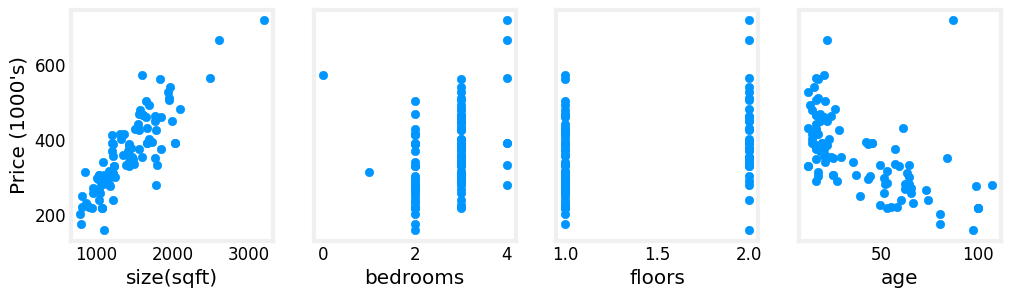

In [5]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

Gradient Descent With Multiple Variables

Learning Rate

𝛼= 9.9e-7

In [9]:
neg = 1e-3

def f_wb(x, w, b):
    return np.dot(x,w)+b

# cost function
def compute_cost(x, y, w, b):
    sum_diff = 0
    for i in range(len(x)):
        y_pred = f_wb(x[i], w, b)
        sum_diff += (y_pred - y[i])**2
    return sum_diff/(2.0*len(x))

# update dj_dw, dj_db
def update_wb(X,y,w,b, alpha):
    m,n = X.shape
    sum_dw = np.zeros(n)
    sum_db = 0.
    for i in range(m):
        diff = f_wb(X[i],w,b) - y[i]
        for j in range(n):
            # 根据这一行数据更新dw1, dw2, dw3, .... dwn
            sum_dw[j] += diff * X[i,j]
        sum_db += diff
    w_new = w - alpha * sum_dw/ m
    b_new = b - alpha * sum_db/ m
    return w_new, b_new

# gradient descent
def run_gradient_descent(x, y, iterations, alpha):
    w = np.zeros(x[0].shape)
    b = 0.
    lastcost = 1e9
    iteration = 0
    while True:
        cost = compute_cost(x,y,w,b)
        print(f"iter:{iteration:5}: w={w}, b={b}, cost={cost}")
        if abs(lastcost-cost)<neg or iteration>=iterations:
            break
        else:
            lastcost = cost
            iteration +=1

        w,b = update_wb(x,y,w,b,alpha)
    return w,b

run_gradient_descent(X_train, y_train, 10, alpha = 9.9e-7)

iter:    0: w=[0. 0. 0. 0.], b=0.0, cost=71024.09206744
iter:    1: w=[5.43e-01 9.91e-04 5.11e-04 1.23e-02], b=0.0003586171248, cost=93105.49165523124
iter:    2: w=[-8.04e-02 -1.60e-04 -9.31e-05 -3.21e-03], b=-4.371595497461517e-05, cost=122207.39443625312
iter:    3: w=[6.36e-01 1.15e-03 5.83e-04 1.32e-02], b=0.00042753756354613616, cost=160561.83794183953
iter:    4: w=[-0.19 -0.   -0.   -0.01], b=-0.00010409001756762535, cost=211110.49432022308
iter:    5: w=[7.57e-01 1.36e-03 6.83e-04 1.49e-02], b=0.000515608532550849, cost=277730.28539994895
iter:    6: w=[-0.33 -0.   -0.   -0.01], b=-0.00018642231661133144, cost=365530.7278459759
iter:    7: w=[9.18e-01 1.64e-03 8.20e-04 1.74e-02], b=0.0006289145937820745, cost=481245.8136507911
iter:    8: w=[-0.51 -0.   -0.   -0.02], b=-0.00029769805054769536, cost=633750.4817034598
iter:    9: w=[1.13e+00 2.02e-03 1.01e-03 2.12e-02], b=0.0007754747892522194, cost=834741.291841227
iter:   10: w=[-0.75 -0.   -0.   -0.02], b=-0.00044712322383020

(array([-0.75, -0.  , -0.  , -0.02]), -0.00044712322383020427)

In [12]:
#set alpha to 9.9e-7
from work.lab_utils_multi import  run_gradient_descent 
_, _, hist = run_gradient_descent(X_train, y_train, 10, alpha = 9.9e-7)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 9.31055e+04  5.4e-01  9.9e-04  5.1e-04  1.2e-02  3.6e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 1.22207e+05 -8.0e-02 -1.6e-04 -9.3e-05 -3.2e-03 -4.4e-05  6.3e+05  1.2e+03  6.1e+02  1.6e+04  4.1e+02
        2 1.60562e+05  6.4e-01  1.1e-03  5.8e-04  1.3e-02  4.3e-04 -7.2e+05 -1.3e+03 -6.8e+02 -1.7e+04 -4.8e+02
        3 2.11110e+05 -1.9e-01 -3.7e-04 -2.1e-04 -7.0e-03 -1.0e-04  8.3e+05  1.5e+03  8.0e+02  2.0e+04  5.4e+02
        4 2.77730e+05  7.6e-01  1.4e-03  6.8e-04  1.5e-02  5.2e-04 -9.5e+05 -1.7e+03 -9.0e+02 -2.2e+04 -6.3e+02
        5 3.65531e+05 -3.3e-01 -6.4e-04 -3.6e-04 -1.2e-02 -1.9e-04  1.1e+06  2.0e+03  1.1e+03  2.7e+04  7.1e+02
        6 4.81246e+05  9.2e-01  1.6e-03  8.2e-04  1.7e-02  6.3e-04 -1.3e+06 -2.3e+03 -1.2e+03 -2.9e+04 -

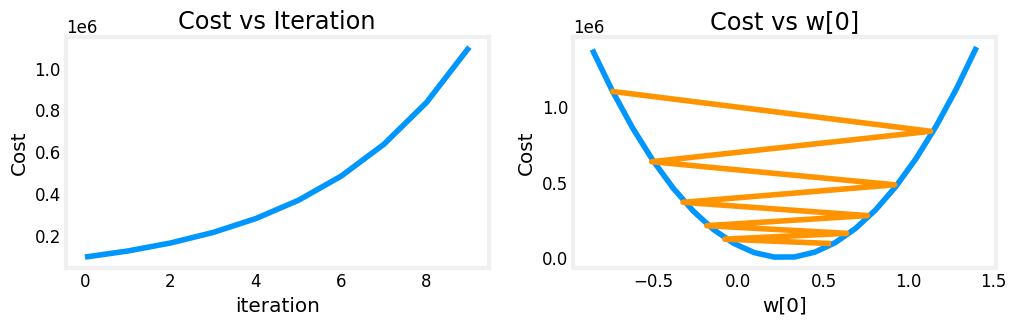

In [13]:
plot_cost_i_w(X_train, y_train, hist)

𝛼
= 9e-7

In [14]:
#set alpha to 9e-7
_,_,hist = run_gradient_descent(X_train, y_train, 10, alpha = 9e-7)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 6.46137e+04  4.9e-01  9.0e-04  4.6e-04  1.1e-02  3.3e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 5.87949e+04  2.3e-02  3.1e-05  7.5e-06 -6.2e-04  2.3e-05  5.2e+05  9.7e+02  5.1e+02  1.3e+04  3.4e+02
        2 5.35131e+04  4.7e-01  8.5e-04  4.3e-04  9.5e-03  3.2e-04 -5.0e+05 -9.1e+02 -4.7e+02 -1.1e+04 -3.3e+02
        3 4.87187e+04  4.5e-02  5.9e-05  1.3e-05 -1.3e-03  4.5e-05  4.7e+05  8.8e+02  4.6e+02  1.2e+04  3.1e+02
        4 4.43668e+04  4.5e-01  8.0e-04  3.9e-04  7.9e-03  3.1e-04 -4.5e+05 -8.2e+02 -4.2e+02 -1.0e+04 -3.0e+02
        5 4.04165e+04  6.4e-02  8.2e-05  1.7e-05 -2.0e-03  6.5e-05  4.3e+05  8.0e+02  4.2e+02  1.1e+04  2.8e+02
        6 3.68307e+04  4.3e-01  7.5e-04  3.6e-04  6.2e-03  3.1e-04 -4.1e+05 -7.5e+02 -3.8e+02 -9.2e+03 -

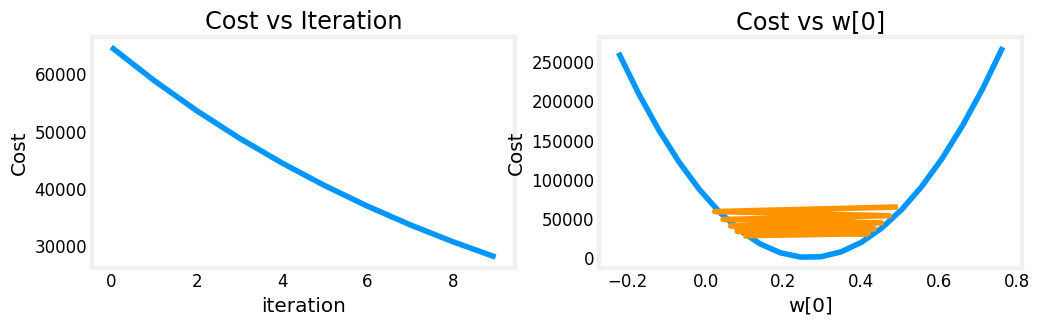

In [15]:
plot_cost_i_w(X_train, y_train, hist)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 6.46137e+04  4.9e-01  9.0e-04  4.6e-04  1.1e-02  3.3e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
      100 1.53764e+03  2.6e-01 -9.5e-05 -5.0e-04 -5.1e-02  5.8e-04 -4.3e+03 -2.0e+00  4.0e+00  5.0e+02 -7.5e+00
      200 1.50380e+03  2.6e-01 -6.1e-04 -1.2e-03 -1.0e-01  1.0e-03 -4.7e+01  5.4e+00  8.0e+00  5.5e+02 -5.0e+00
      300 1.47847e+03  2.6e-01 -1.1e-03 -2.0e-03 -1.5e-01  1.5e-03 -1.2e+01  5.1e+00  8.0e+00  5.1e+02 -5.2e+00
      400 1.45701e+03  2.6e-01 -1.5e-03 -2.7e-03 -1.9e-01  1.9e-03 -1.1e+01  4.7e+00  7.9e+00  4.7e+02 -5.4e+00
      500 1.43884e+03  2.6e-01 -1.9e-03 -3.4e-03 -2.3e-01  2.4e-03 -1.0e+01  4.3e+00  7.9e+00  4.3e+02 -5.6e+00
      600 1.42345e+03  2.6e-01 -2.3e-03 -4.1e-03 -2.7e-01  2.9e-03 -9.5e+00  4.0e+00  7.8e+00  4.0e+02 -

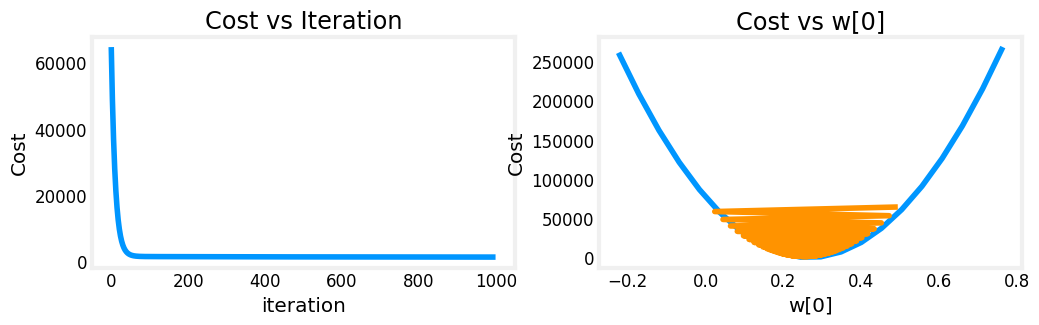

In [16]:
#set iterations to 1000
_,_,hist = run_gradient_descent(X_train, y_train, 1000, alpha = 9e-7)
plot_cost_i_w(X_train, y_train, hist)

𝛼 = 1e-7

In [17]:
#set alpha to 1e-7
_,_,hist = run_gradient_descent(X_train, y_train, 10, alpha = 1e-7)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 4.41544e+04  5.5e-02  1.0e-04  5.2e-05  1.2e-03  3.6e-05 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 2.76797e+04  9.8e-02  1.8e-04  9.2e-05  2.2e-03  6.5e-05 -4.3e+05 -7.8e+02 -4.0e+02 -9.6e+03 -2.8e+02
        2 1.75784e+04  1.3e-01  2.4e-04  1.2e-04  2.9e-03  8.7e-05 -3.4e+05 -6.1e+02 -3.1e+02 -7.4e+03 -2.2e+02
        3 1.13850e+04  1.6e-01  2.9e-04  1.5e-04  3.5e-03  1.0e-04 -2.6e+05 -4.8e+02 -2.4e+02 -5.6e+03 -1.8e+02
        4 7.58758e+03  1.8e-01  3.2e-04  1.7e-04  3.9e-03  1.2e-04 -2.1e+05 -3.7e+02 -1.9e+02 -4.3e+03 -1.4e+02
        5 5.25923e+03  1.9e-01  3.5e-04  1.8e-04  4.3e-03  1.3e-04 -1.6e+05 -2.9e+02 -1.5e+02 -3.2e+03 -1.1e+02
        6 3.83162e+03  2.1e-01  3.8e-04  1.9e-04  4.5e-03  1.4e-04 -1.3e+05 -2.3e+02 -1.1e+02 -2.4e+03 -

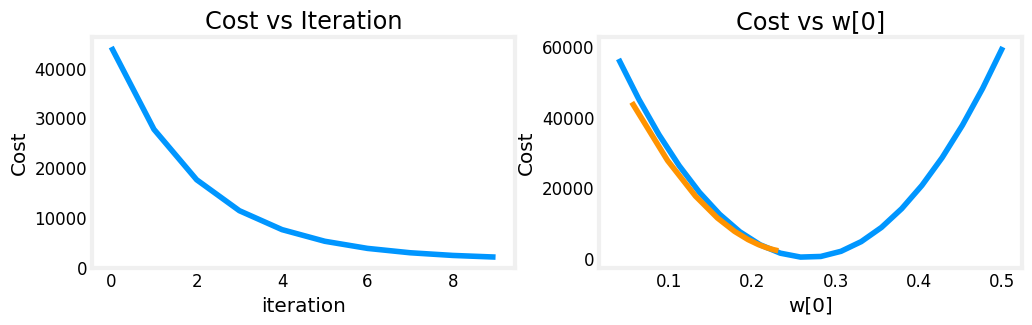

In [33]:
plot_cost_i_w(X_train,y_train,hist)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 1.00332e+04  1.6e-01  3.0e-04  1.5e-04  3.7e-03  1.1e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
      100 1.55683e+03  2.5e-01  2.7e-04 -6.6e-06 -1.3e-02  3.0e-04 -1.5e+01  6.3e+00  8.2e+00  6.3e+02 -4.5e+00
      200 1.54507e+03  2.5e-01  8.6e-05 -2.5e-04 -3.2e-02  4.4e-04 -1.5e+01  6.1e+00  8.2e+00  6.2e+02 -4.6e+00
      300 1.53393e+03  2.5e-01 -9.4e-05 -5.0e-04 -5.1e-02  5.8e-04 -1.4e+01  5.9e+00  8.1e+00  6.0e+02 -4.7e+00
      400 1.52340e+03  2.5e-01 -2.7e-04 -7.4e-04 -6.8e-02  7.2e-04 -1.4e+01  5.8e+00  8.1e+00  5.8e+02 -4.8e+00
      500 1.51343e+03  2.6e-01 -4.4e-04 -9.8e-04 -8.6e-02  8.6e-04 -1.4e+01  5.6e+00  8.1e+00  5.7e+02 -4.8e+00
      600 1.50400e+03  2.6e-01 -6.1e-04 -1.2e-03 -1.0e-01  1.0e-03 -1.3e+01  5.5e+00  8.1e+00  5.5e+02 -

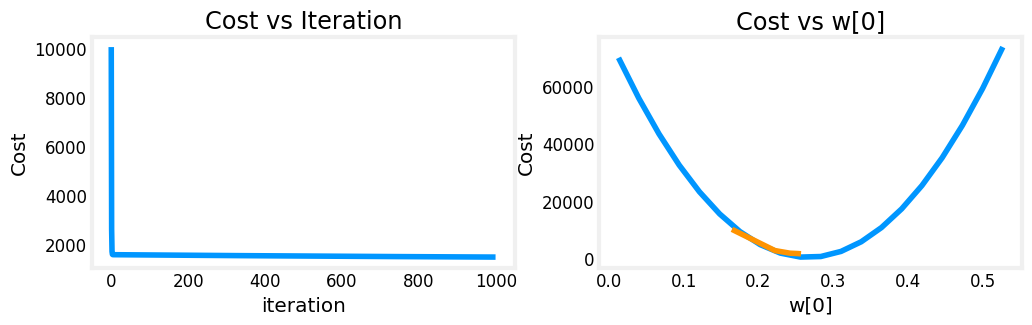

In [63]:
#set alpha to 3e-7 and iteration to 1000
_,_,hist = run_gradient_descent(X_train, y_train, 1000, alpha = 3e-7)
plot_cost_i_w(X_train,y_train,hist)

900 1.47865e+03  2.6e-01 -1.1e-03 -1.9e-03 -1.5e-01  1.5e-03 -1.2e+01  5.1e+00  8.0e+00  5.1e+02 -5.2e+00

w,b found by gradient descent: w: [ 0.26 -0.   -0.   -0.17], b: 0.00

## Feature Scaling

z-score normalization

In [46]:
def zscore_normalization(x):
    avg = np.zeros_like(x[0])
    std = np.zeros_like(x[0])
    for i in range(len(x[0])):
        avg[i] = np.mean(x[:,i])
        std[i] = np.std(x[:,i]) # np.std(x, axis=0)
    #print(avg)
    #print(std)

    # for i in range(len(x)):
    #     for j in range(len(x[0])):
    #         x[i,j] = (x[i,j] - avg[j]) / std[j]
    x_norm = (x-avg) / std
    return (x_norm, avg, std)

In [38]:
x_norm, mu, sigma = zscore_normalization(X_train)
print(x_norm)

[1.41e+03 2.71e+00 1.38e+00 3.86e+01]
[412.17   0.65   0.49  25.79]
[[-1.12 -1.09 -0.78  1.02]
 [-0.41  0.44 -0.78  0.98]
 [ 1.29  0.44  1.28 -0.84]
 [ 0.76  0.44  1.28  0.13]
 [ 1.32  0.44  1.28 -0.92]
 [-0.24 -1.09 -0.78 -0.96]
 [-1.33 -1.09 -0.78  1.06]
 [ 1.02  0.44 -0.78 -0.84]
 [-0.94  0.44 -0.78  0.17]
 [ 4.32  1.98  1.28  1.88]
 [-1.52 -1.09 -0.78  1.6 ]
 [-0.52 -1.09  1.28 -0.84]
 [ 0.35 -1.09 -0.78 -0.8 ]
 [ 0.04  0.44 -0.78 -0.72]
 [-0.47 -1.09 -0.78 -0.92]
 [-0.78 -1.09 -0.78  0.98]
 [-1.37 -2.62 -0.78 -0.84]
 [ 0.65  0.44  1.28 -0.61]
 [ 0.86  0.44  1.28 -0.8 ]
 [-0.91  0.44 -0.78  0.21]
 [ 0.58 -1.09 -0.78 -0.68]
 [-0.79 -1.09 -0.78 -0.14]
 [-0.24  0.44 -0.78 -0.96]
 [ 0.43 -4.15 -0.78 -0.72]
 [-1.07 -1.09 -0.78  1.33]
 [-0.77  0.44 -0.78 -0.06]
 [-0.99 -1.09 -0.78  0.48]
 [-1.24  0.44 -0.78  0.63]
 [ 0.68  0.44 -0.78 -0.99]
 [-0.83 -1.09 -0.78  2.38]
 [ 0.01  0.44  1.28 -0.76]
 [-0.61  0.44 -0.78  0.52]
 [ 1.26  0.44  1.28 -1.03]
 [-0.48 -1.09  1.28  1.37]
 [ 2.59  1.98 

In [39]:
#check our work
from sklearn.preprocessing import scale
x_norm_ans = scale(X_train, axis=0, with_mean=True, with_std=True, copy=True)

if( ((x_norm_ans-x_norm) < 1e-6).all ):
    print("right answer")

right answer


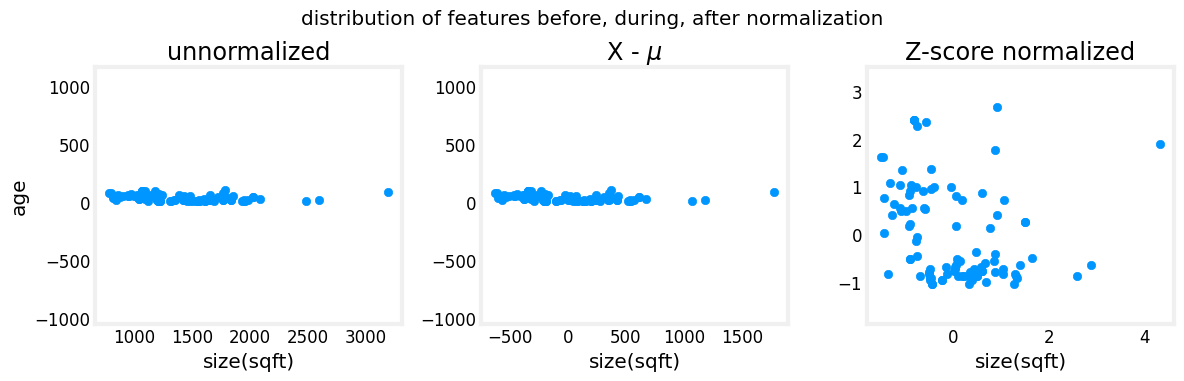

In [41]:
mu = np.mean(X_train, axis= 0)
sigma = np.std(X_train, axis=0)
X_mean = (X_train - mu)
X_norm = (X_train - mu) / sigma

fig, ax = plt.subplots(1,3,figsize=(12,4))
ax[0].scatter(X_train[:,0], X_train[:,3])
ax[0].set_xlabel(X_features[0]);    ax[0].set_ylabel(X_features[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

# The first step removes the mean or average value from each feature. 
# This leaves features that are centered around zero.
ax[1].scatter(X_mean[:,0], X_train[:,3])
ax[1].set_xlabel(X_features[0]);    ax[0].set_ylabel(X_features[3]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

# The second step divides by the standard deviation.
# This leaves both features centered at zero with a similar scale.
ax[2].scatter(X_norm[:,0], X_norm[:,3])
ax[2].set_xlabel(X_features[0]);    ax[0].set_ylabel(X_features[3]);
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')

plt.tight_layout(rect=[0,0.03,1,0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

In [49]:
X_norm, X_mu, X_sigma = zscore_normalization(X_train)
#print(np.std(X_train, axis=0))
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu = [1.41e+03 2.71e+00 1.38e+00 3.86e+01], 
X_sigma = [412.17   0.65   0.49  25.79]
Peak to Peak range by column in Raw        X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X:[5.84 6.13 2.06 3.68]


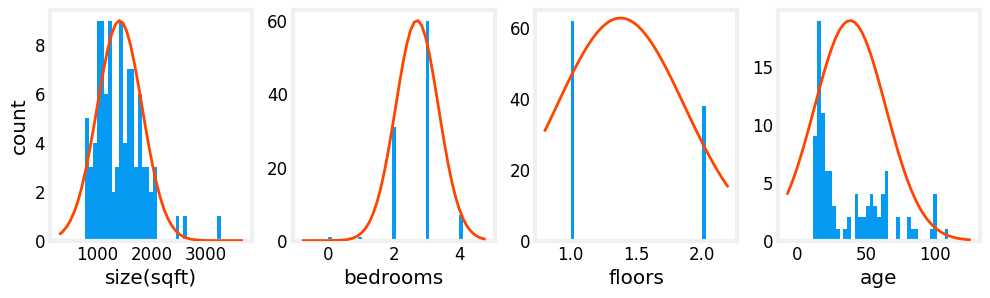

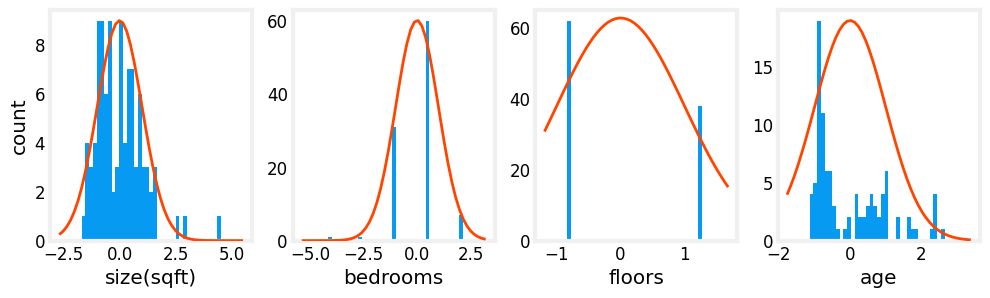

In [58]:
# 4列，每列画原始数据各列的正态分布
fix, ax = plt.subplots(1,4, figsize=(12,3))

for i in range(len(ax)):
    norm_plot(ax[i], X_train[:,i])
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count")
fig.suptitle("distribution of features before normalization")
plt.show()

# 4列，每列画normalize后数据各列的正态分布
# 可以看到，分布情况不变，但是range变了，都在mu=0周围and roughly +/- 2
fix, ax = plt.subplots(1,4,figsize=(12,3))

for i in range(len(ax)):
    norm_plot(ax[i], X_norm[:,i])
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count"); 
fig.suptitle("distribution of features after normalization")

plt.show()


Let's re-run our gradient descent algorithm with normalized data.
Note the **vastly larger value of alpha**. This will speed up gradient descent.

In [60]:
w_norm, b_norm, hist = run_gradient_descent(X_norm, y_train, 1000, 1.0e-1, )


Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 5.73264e+04  8.9e+00  3.0e+00  3.3e+00 -6.0e+00  3.6e+01 -8.9e+01 -3.0e+01 -3.3e+01  6.0e+01 -3.6e+02
      100 2.21728e+02  1.1e+02 -2.0e+01 -3.1e+01 -3.8e+01  3.6e+02 -9.4e-01  4.6e-01  5.4e-01 -1.8e-01 -9.6e-03
      200 2.19714e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.3e-02  1.6e-02  1.8e-02 -6.4e-03 -2.6e-07
      300 2.19711e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.1e-03  5.7e-04  6.3e-04 -2.2e-04 -6.9e-12
      400 2.19711e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.9e-05  2.0e-05  2.2e-05 -7.6e-06 -2.7e-13
      500 2.19711e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.3e-06  6.8e-07  7.5e-07 -2.6e-07 -2.8e-13
      600 2.19711e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -4.7e-08  2.4e-08  2.6e-08 -9.1e-09 -

The scaled features get very accurate results **much, much faster!**. Notice the gradient of each parameter is tiny by the end of this fairly short run. A learning rate of 0.1 is a good start for regression with normalized features.   
Let's plot our predictions versus the target values. Note, the prediction is made using the normalized feature while the plot is shown using the original feature values.

1. alpha相比之前的很大，但仍然可以收敛  
2. 比之前的结果更准确，同样的迭代次数cost小很多  

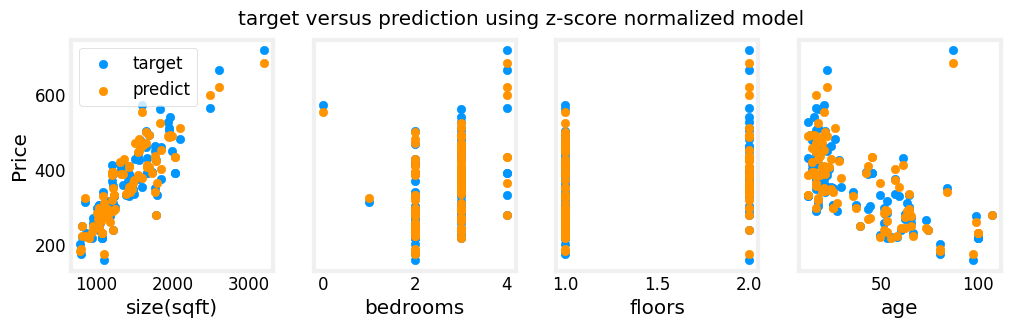

In [66]:
#predict target using normalized features
m = X_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_norm[i], w_norm) + b_norm

    # plot predictions and targets versus original features    
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],yp,color=dlc["dlorange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

In [77]:
x_house = np.array([1200, 3, 1, 40])
# 这里使用了之前normalize X_train时的均值和方差
x_house_norm = (x_house - X_mu) / X_sigma
print(x_house_norm)
x_house_predict = f_wb(x_house_norm, w_norm, b_norm)
print(x_house_predict)
print(f" predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${x_house_predict*1000:0.0f}")

[-0.52  0.44 -0.78  0.05]
318.93635903940685
 predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $318936


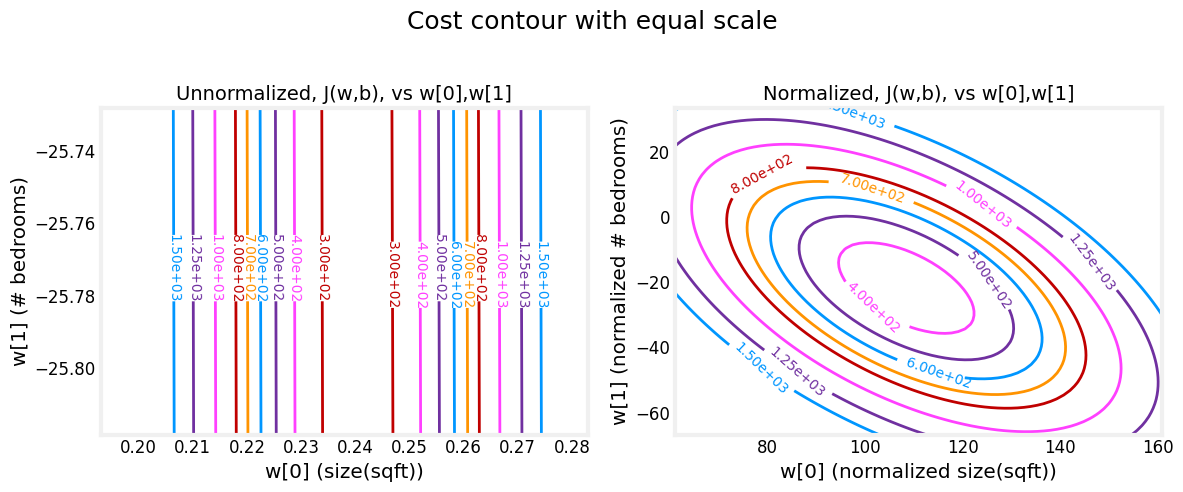

In [78]:
plt_equal_scale(X_train, X_norm, y_train)